In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])
model_data

X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)


Epoch 1/100
98/98 [==============================] - 2s 7ms/step - loss: 1097.6523 - val_loss: 579.2131
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 657.2371 - val_loss: 497.0701
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 626.4731 - val_loss: 472.5693
Epoch 4/100
98/98 [==============================] - 1s 10ms/step - loss: 595.7269 - val_loss: 444.1019
Epoch 5/100
98/98 [==============================] - 1s 5ms/step - loss: 557.9183 - val_loss: 410.9687
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 511.6776 - val_loss: 377.2504
Epoch 7/100
98/98 [==============================] - 1s 7ms/step - loss: 466.2042 - val_loss: 346.6111
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 429.2600 - val_loss: 326.0536
Epoch 9/100
98/98 [==============================] - 0s 5ms/step - loss: 399.1077 - val_loss: 315.5617
Epoch 10/100
98/98 [==============================] - 1s 8ms/step - los

Średni błąd kwadratowy (MSE): 75.32091054462425
Procentowa zgodność: 88.04%


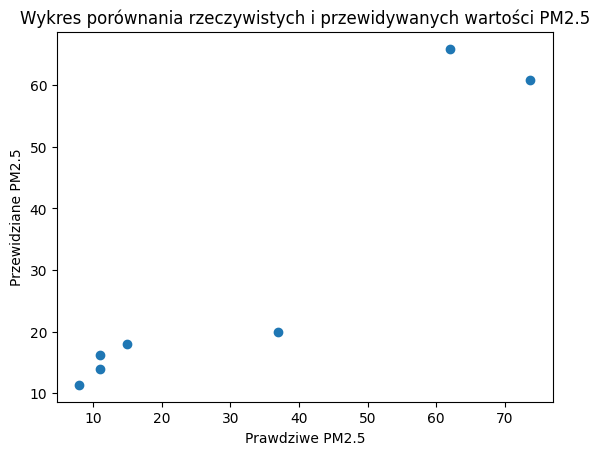

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,16.242214,-5.242214
2194,10.98,13.922314,-2.942314
3276,73.73,60.864712,12.865288
199,15.00,18.046921,-3.046921
1091,8.00,11.324686,-3.324686
80,37.00,19.963030,17.036970
2602,62.02,65.892609,-3.872609


In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred.flatten()})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class R2Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

# Utwórz model sieci neuronowej
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Skompiluj model
model.compile(optimizer='adam', loss='mean_squared_error')

# Trenuj model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[R2Callback()])


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)


Epoch 1/100
98/98 [==============================] - 1s 3ms/step - loss: 1145.6089 - val_loss: 653.4728
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 671.0200 - val_loss: 496.7534
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 629.2889 - val_loss: 471.5129
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 595.9227 - val_loss: 443.1111
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 553.8118 - val_loss: 406.0507
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 505.1296 - val_loss: 365.4221
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 453.3741 - val_loss: 332.3781
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 410.1531 - val_loss: 309.1776
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 380.0249 - val_loss: 294.5096
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss

Średni błąd kwadratowy (MSE): 75.32091054462425
Procentowa zgodność: 88.04%


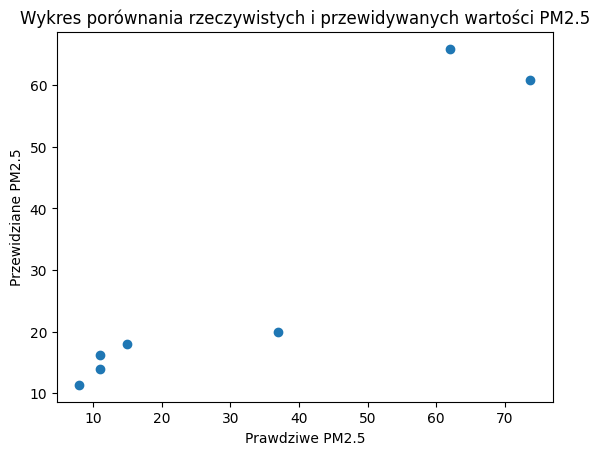

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,16.242214,-5.242214
2194,10.98,13.922314,-2.942314
3276,73.73,60.864712,12.865288
199,15.00,18.046921,-3.046921
1091,8.00,11.324686,-3.324686
80,37.00,19.963030,17.036970
2602,62.02,65.892609,-3.872609


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred.flatten()})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results

In [9]:

# Lista różnych ilości warstw ukrytych
hidden_layers = [1, 2, 3, 4]

for num_hidden_layers in hidden_layers:
    print(f"Number of Hidden Layers: {num_hidden_layers}")
    
    # Utwórz model sieci neuronowej z odpowiednią ilością warstw ukrytych
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(num_hidden_layers):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Skompiluj model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Trenuj model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

    # Oblicz R2 Score na danych testowych
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(r2)


Number of Hidden Layers: 1
1/1 [==============================] - 0s 96ms/step
0.8908121328703039

Number of Hidden Layers: 2
1/1 [==============================] - 0s 149ms/step
0.9022740149447337

Number of Hidden Layers: 3
1/1 [==============================] - 0s 214ms/step
0.906430910116377

Number of Hidden Layers: 4
1/1 [==============================] - 0s 96ms/step
0.8763538969209634



Epoch 1/300
98/98 [==============================] - 2s 8ms/step - loss: 1018.0545 - val_loss: 517.3069
Epoch 2/300
98/98 [==============================] - 1s 7ms/step - loss: 641.7159 - val_loss: 481.1874
Epoch 3/300
98/98 [==============================] - 1s 8ms/step - loss: 598.4474 - val_loss: 437.7872
Epoch 4/300
98/98 [==============================] - 1s 8ms/step - loss: 530.5673 - val_loss: 374.7058
Epoch 5/300
98/98 [==============================] - 1s 6ms/step - loss: 446.6859 - val_loss: 321.8704
Epoch 6/300
98/98 [==============================] - 0s 5ms/step - loss: 387.2373 - val_loss: 294.6494
Epoch 7/300
98/98 [==============================] - 1s 6ms/step - loss: 353.7682 - val_loss: 278.8365
Epoch 8/300
98/98 [==============================] - 1s 6ms/step - loss: 335.3118 - val_loss: 272.0592
Epoch 9/300
98/98 [==============================] - 1s 6ms/step - loss: 321.7342 - val_loss: 263.9776
Epoch 10/300
98/98 [==============================] - 1s 8ms/step - loss

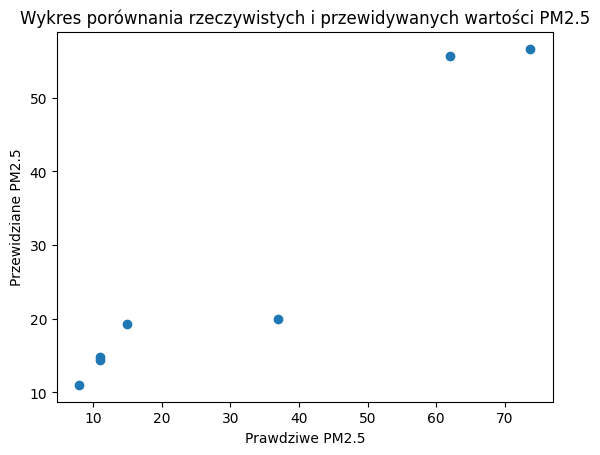

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,14.772489,-3.772489
2194,10.98,14.351192,-3.371192
3276,73.73,56.642799,17.087201
199,15.00,19.313562,-4.313562
1091,8.00,11.022436,-3.022436
80,37.00,19.947382,17.052618
2602,62.02,55.671852,6.348148


In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class R2Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

# Utwórz model sieci neuronowej
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Skompiluj model
model.compile(optimizer='adam', loss='mean_squared_error')

# Trenuj model
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[R2Callback()])


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred.flatten()})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

# Wczytaj dane
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])

# Podziel dane na wejścia (X) i wyjścia (y)
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']

# Podziel dane na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

# Znormalizuj dane
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Utwórz model sieci neuronowej z ilością neuronów jako zmienną hiperparametru
def create_model(num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Przeszukaj różne ilości neuronów w warstwach ukrytych i zapisz najlepszy model
best_r2_score = -1
best_model = None

for num_neurons in [16, 32, 64, 128]:
    model = create_model(num_neurons)
    
    # Trenuj model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)
    
    # Oblicz R2 Score na danych testowych
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Zapisz najlepszy model
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model

# Wydrukuj najlepszy R2 Score i zapisz najlepszy model
print(f'Best R2 Score on test data: {best_r2_score:.4f}')


1/1 [==============================] - 0s 39ms/step
Best R2 Score on test data: 0.9096


In [29]:

# Teraz masz najlepszy model i jego R2 Score
best_model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 16)                96        
                                                                 
 dense_136 (Dense)           (None, 16)                272       
                                                                 
 dense_137 (Dense)           (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

# Wczytaj dane
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])

# Podziel dane na wejścia (X) i wyjścia (y)
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']

# Podziel dane na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

# Znormalizuj dane
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Utwórz model sieci neuronowej z ilością warstw i neuronów jako zmiennymi hiperparametrami
def create_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Przeszukaj różne ilości warstw i neuronów
best_r2_score = -1
best_model = None

for num_layers in [1, 2, 3, 4]:
    for num_neurons in [16, 32, 64, 128]:
        model = create_model(num_layers, num_neurons)
    
        # Trenuj model
        model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=0)
    
        # Oblicz R2 Score na danych testowych
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
    
        # Zapisz najlepszy model
        if r2 > best_r2_score:
            best_r2_score = r2
            best_model = model

# Wydrukuj najlepszy R2 Score i zapisz najlepszy model
print(f'Best R2 Score on test data: {best_r2_score:.4f}')


1/1 [==============================] - 0s 62ms/step
Best R2 Score on test data: 0.9077
